## Load library & data

In [4]:
#load all the necessary python libraries to preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [5]:
import shap
shap.initjs()

In [11]:
# load data
df_ojol = pd.read_csv('dsa_ojol_dataset_clean1_v2.csv',delimiter="|")

# DATA UNDERSTANDING
## Explore Data

In [12]:
print("{} rows x {} columns".format(df_ojol.shape[0], df_ojol.shape[1])) 

695597 rows x 31 columns


In [13]:
df_ojol.head()

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,Y,10000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,NaN,135000
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,NaN,30000
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,Y,15000
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,Y,15000


In [10]:
ojol_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695597 entries, 0 to 695596
Data columns (total 31 columns):
msisdn                   695597 non-null int64
mytsel_app_user          695597 non-null int64
total_revenue            695597 non-null int64
rev_voice                695597 non-null int64
rev_sms                  695597 non-null int64
rev_broadband            695597 non-null int64
rev_voice_pack           695597 non-null int64
rev_sms_pack             695597 non-null int64
rev_data_pack            695597 non-null int64
rev_pack_mytsel          695597 non-null int64
rev_voice_pack_mytsel    695597 non-null int64
rev_sms_pack_mytsel      695597 non-null int64
rev_data_pack_mytsel     695597 non-null int64
trx_voice                695597 non-null int64
trx_voice_onnet          695597 non-null int64
trx_voice_offnet         695597 non-null int64
mou_voice                695597 non-null int64
mou_voice_onnet          695597 non-null int64
mou_voice_offnet         695597 non-null in

int64     28
object     3
dtype: int64


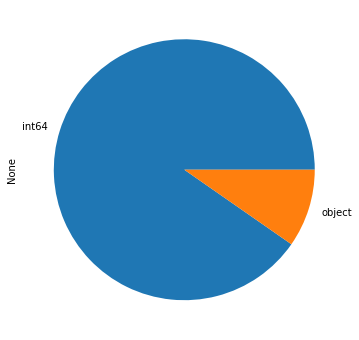

In [14]:
dcounts = df_ojol.get_dtype_counts()
print(dcounts)
labels = dcounts
plot = dcounts.plot.pie(figsize=(9, 6))

In [15]:
df_ojol.describe().T

,count,mean,std,min,25%,50%,75%,max
msisdn,695597.0,6.213143e+12,6.207486e+11,6.281116e+11,6.281289e+12,6.281382e+12,6.282245e+12,6.285400e+12
mytsel_app_user,695597.0,5.111739e-01,4.998755e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
total_revenue,695597.0,1.285793e+05,1.029296e+05,3.000000e+00,7.546000e+04,9.919600e+04,1.600010e+05,2.375649e+07
rev_voice,695597.0,9.242296e+03,2.415494e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.467000e+03,2.348500e+06
rev_sms,695597.0,1.050805e+03,3.917839e+03,0.000000e+00,0.000000e+00,1.650000e+02,8.250000e+02,5.910000e+05
rev_broadband,695597.0,1.087423e+05,7.950347e+04,0.000000e+00,7.500000e+04,7.880100e+04,1.500000e+05,1.322500e+07
rev_voice_pack,695597.0,3.547871e+03,1.594635e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.348500e+06
rev_sms_pack,695597.0,2.839516e+01,1.274283e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.910000e+05
rev_data_pack,695597.0,1.042546e+05,7.740342e+04,0.000000e+00,7.500000e+04,7.500000e+04,1.500000e+05,1.322500e+07
rev_pack_mytsel,695597.0,1.264286e+04,5.868835e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.426560e+07


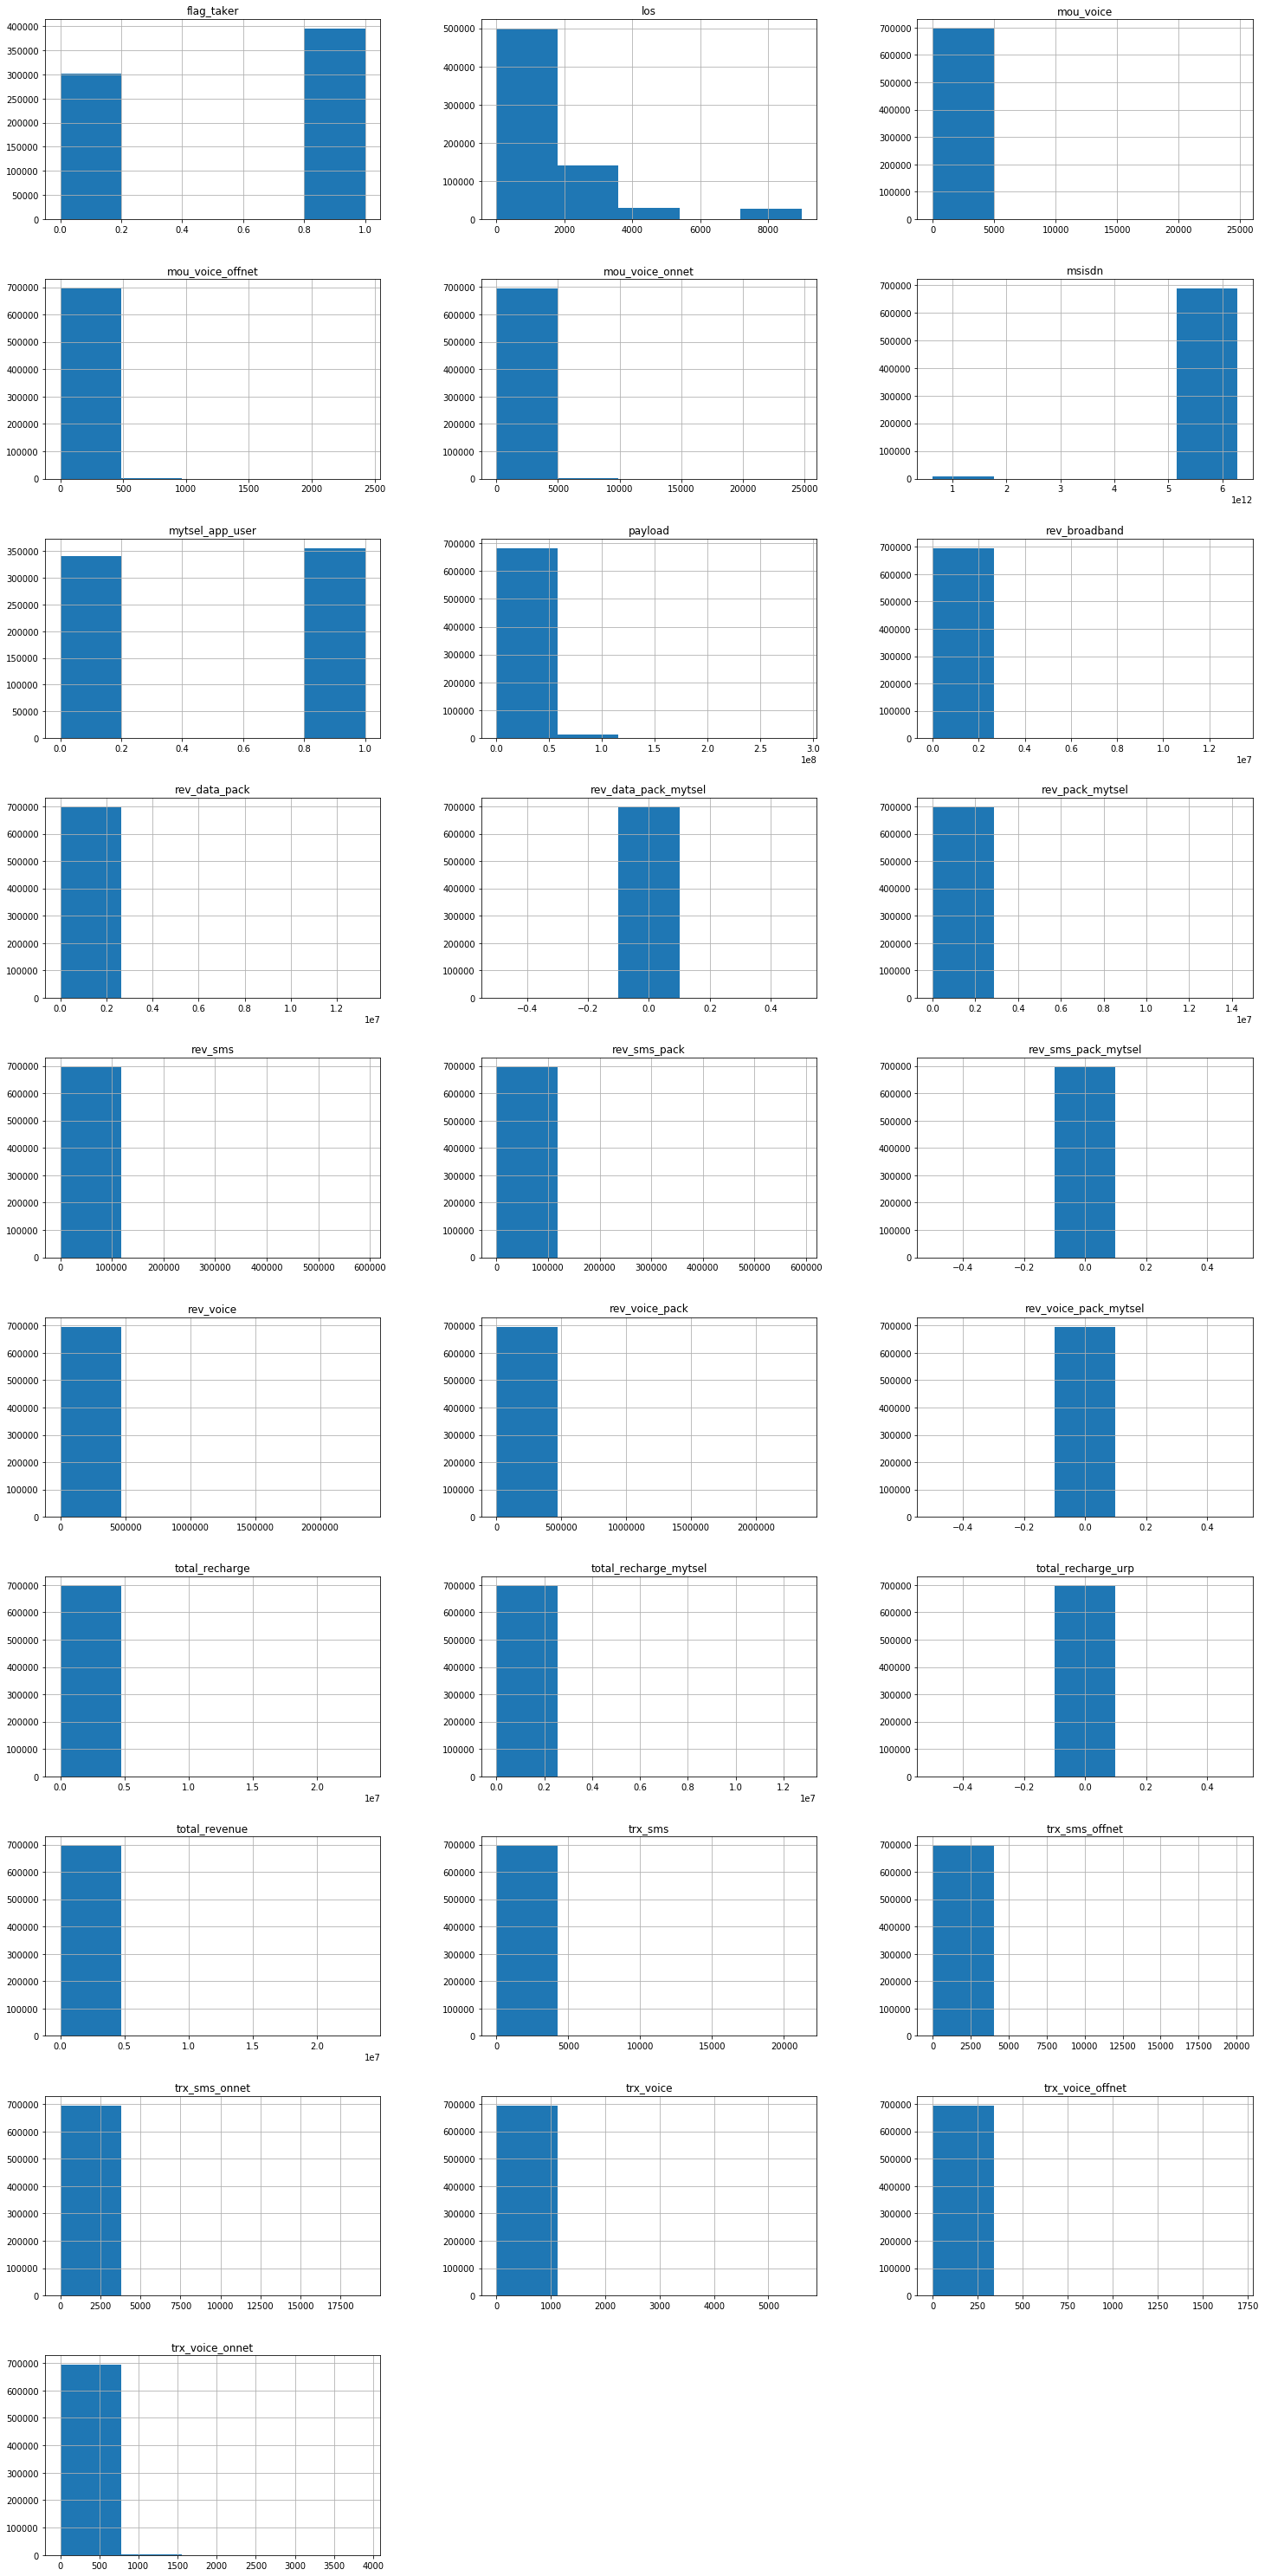

In [16]:
df_ojol.hist(bins=5, figsize=(25, 120), layout=(22, 3));

In [17]:
df_ojol.nunique()

msisdn                   695597
mytsel_app_user               2
total_revenue            204741
rev_voice                 69161
rev_sms                    4545
rev_broadband            145283
rev_voice_pack             5235
rev_sms_pack                209
rev_data_pack              6684
rev_pack_mytsel            3674
rev_voice_pack_mytsel         1
rev_sms_pack_mytsel           1
rev_data_pack_mytsel          1
trx_voice                  1423
trx_voice_onnet            1309
trx_voice_offnet            469
mou_voice                  4339
mou_voice_onnet            4294
mou_voice_offnet            671
trx_sms                    1291
trx_sms_onnet              1258
trx_sms_offnet              442
payload                  654347
total_recharge_mytsel       111
total_recharge_urp            1
region                       13
flag_taker                    2
los                        4467
first_rank_category          14
ojol                          1
total_recharge             1114
dtype: i

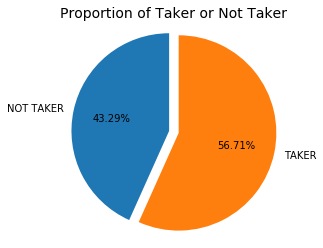

In [18]:
labels = 'NOT TAKER', 'TAKER'
sizes = [df_ojol.flag_taker[df_ojol['flag_taker']==0].count(), df_ojol.flag_taker[df_ojol['flag_taker']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Proportion of Taker or Not Taker", size=14)
plt.show()

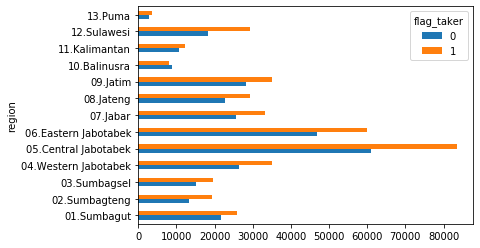

In [19]:
df_ojol.groupby('flag_taker').region.value_counts().unstack(0).plot.barh()

## Duplicate Data

In [20]:
df_ojol.duplicated().sum()

0

## Missing Values

In [21]:
missing_data_clean=pd.DataFrame({'total_missing':df_ojol.isnull().sum(), 
                                 '%missing':(df_ojol.isnull().sum())/(df_ojol.isnull().count())*100})
missing_data_clean[missing_data_clean['total_missing']>0]

,total_missing,%missing
first_rank_category,5078,0.730020
ojol,340026,48.882615


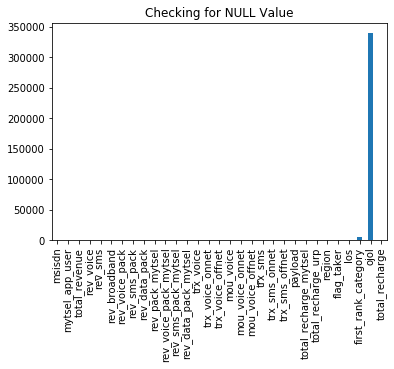

In [22]:
ojol_miss = df_ojol.isnull().sum().plot(kind='bar', title='Checking for NULL Value');

In [23]:
print("NULL: ", df_ojol['first_rank_category'].isnull().sum())
print("Not NULL: ", df_ojol['first_rank_category'].notnull().sum())

NULL:  5078
Not NULL:  690519


In [24]:
print("NULL: ", df_ojol['ojol'].isnull().sum())
print("Not NULL: ", df_ojol['ojol'].notnull().sum())

NULL:  340026
Not NULL:  355571


## Outliers

### Using the Interquartile Range (IQR)

In [25]:
numerical = df_ojol.select_dtypes(np.number).columns
range_col = ['los','total_revenue','total_recharge','rev_voice','rev_sms','rev_broadband','trx_voice','trx_voice_onnet','trx_voice_offnet','mou_voice','mou_voice_onnet','mou_voice_offnet','trx_sms','trx_sms_onnet','trx_sms_offnet','payload']

Q1 = df_ojol.loc[:,range_col].quantile(0.25)
Q3 = df_ojol.loc[:,range_col].quantile(0.75)
IQR=Q3-Q1
Lower_Bound=Q1-(1.5*IQR)
Upper_Bound=Q3+(1.5*IQR)

outlier=pd.DataFrame({'Q1':Q1,'Q3':Q3,'IQR':IQR,'Lower_Bound':Lower_Bound,'Upper_Bound':Upper_Bound})
pd.options.display.float_format = '{:.0f}'.format
outlier

# Anything outside of lower_bound and upper_bound is an outlier.

,Q1,Q3,IQR,Lower_Bound,Upper_Bound
los,567,1977,1410,-1548,4092
total_revenue,75460,160001,84541,-51352,286812
total_recharge,75000,160000,85000,-52500,287500
rev_voice,0,7467,7467,-11200,18668
rev_sms,0,825,825,-1238,2062
rev_broadband,75000,150000,75000,-37500,262500
trx_voice,19,135,116,-155,309
trx_voice_onnet,11,99,88,-121,231
trx_voice_offnet,2,28,26,-37,67
mou_voice,19,191,172,-239,449


### Number of Outliers

In [26]:
for col_name in numerical:
    q1 = df_ojol[col_name].quantile(0.25)
    q3 = df_ojol[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-(1.5*iqr)
    high = q1+(1.5*iqr)
    outliers1=(len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))
    outliers2=((len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))/len(df_ojol))*100
    print(col_name,"=","%d (%.2f" % (outliers1, outliers2),"%)")

msisdn = 105523 (15.17 %)
mytsel_app_user = 0 (0.00 %)
total_revenue = 101402 (14.58 %)
rev_voice = 139850 (20.11 %)
rev_sms = 128426 (18.46 %)
rev_broadband = 83030 (11.94 %)
rev_voice_pack = 106021 (15.24 %)
rev_sms_pack = 2240 (0.32 %)
rev_data_pack = 76243 (10.96 %)
rev_pack_mytsel = 75485 (10.85 %)
rev_voice_pack_mytsel = 0 (0.00 %)
rev_sms_pack_mytsel = 0 (0.00 %)
rev_data_pack_mytsel = 0 (0.00 %)
trx_voice = 114058 (16.40 %)
trx_voice_onnet = 117866 (16.94 %)
trx_voice_offnet = 115970 (16.67 %)
mou_voice = 118329 (17.01 %)
mou_voice_onnet = 124684 (17.92 %)
mou_voice_offnet = 116365 (16.73 %)
trx_sms = 119116 (17.12 %)
trx_sms_onnet = 133550 (19.20 %)
trx_sms_offnet = 109752 (15.78 %)
payload = 91819 (13.20 %)
total_recharge_mytsel = 3484 (0.50 %)
total_recharge_urp = 0 (0.00 %)
flag_taker = 0 (0.00 %)
los = 109963 (15.81 %)
total_recharge = 100026 (14.38 %)


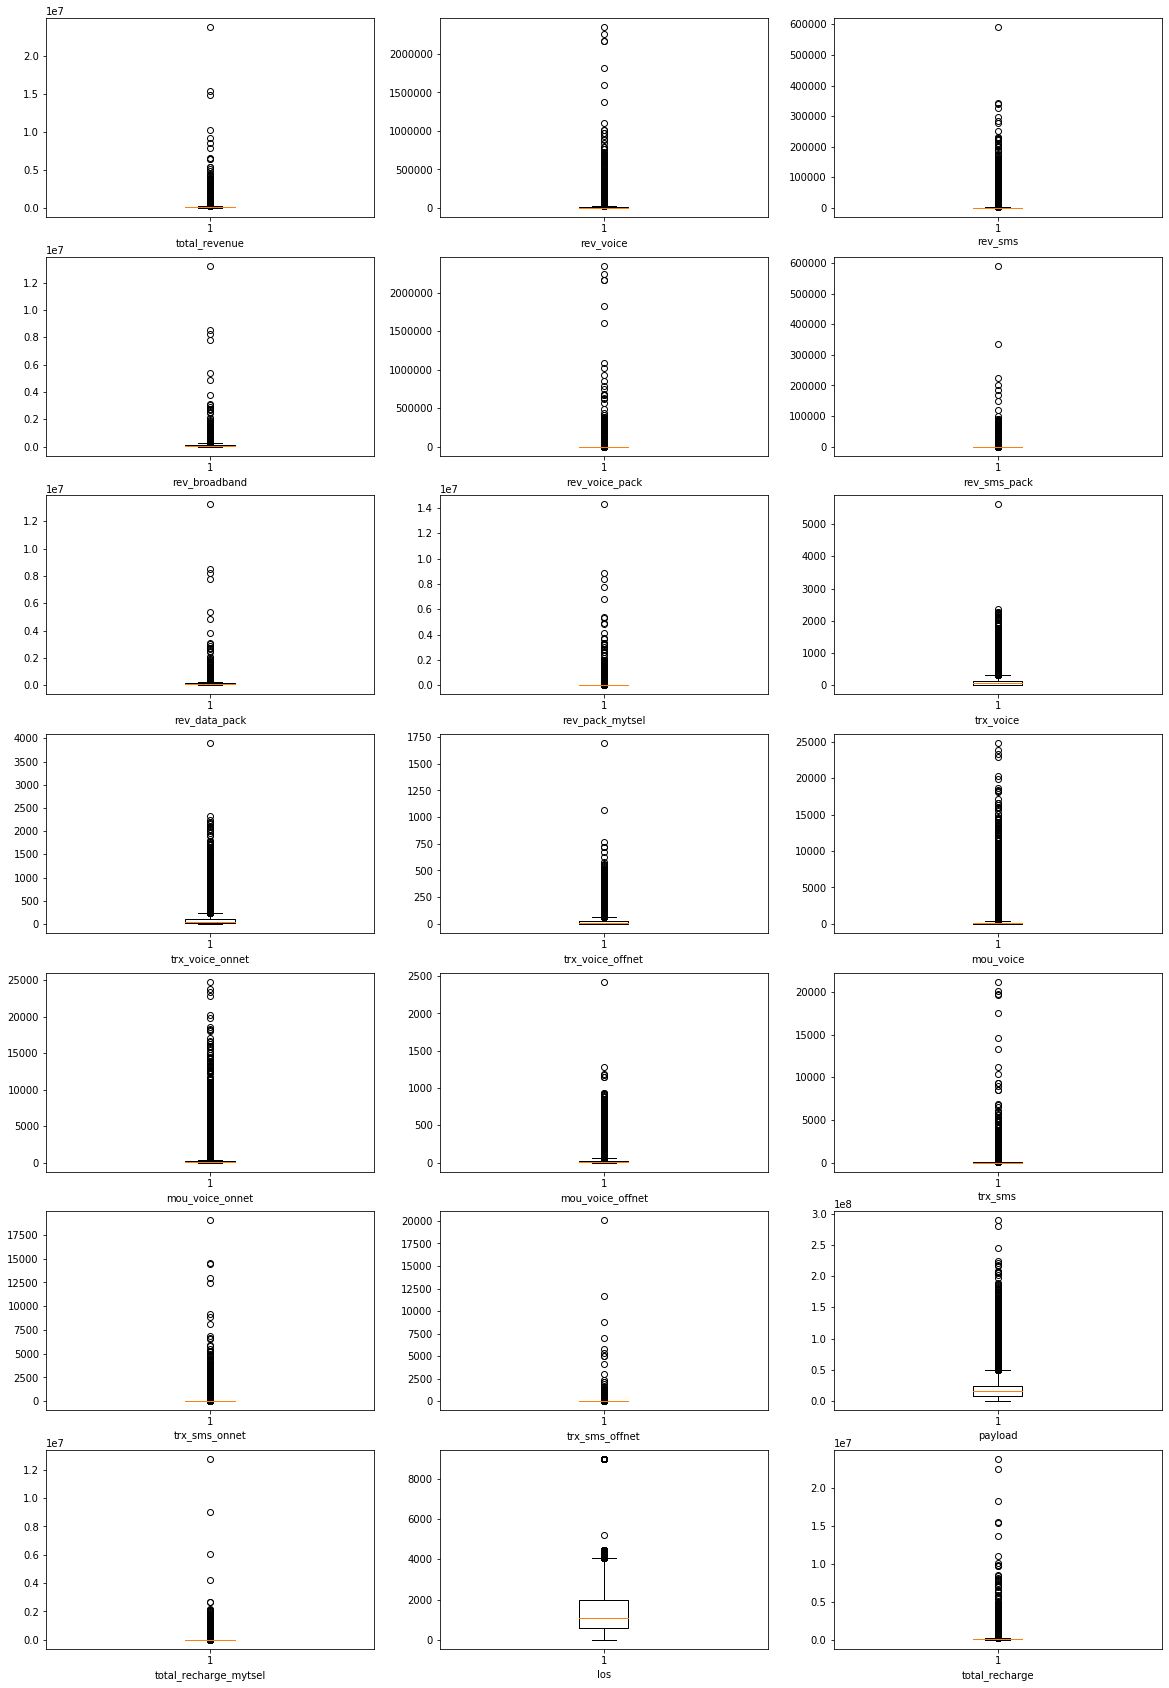

In [27]:
#Cek Outlier
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18),(ax19,ax20,ax21)) = plt.subplots(7, 3,figsize=(20, 30));

ax1.boxplot(df_ojol['total_revenue'])
ax1.set_xlabel('total_revenue')

ax2.boxplot(df_ojol['rev_voice'])
ax2.set_xlabel('rev_voice')

ax3.boxplot(df_ojol['rev_sms'])
ax3.set_xlabel('rev_sms')

ax4.boxplot(df_ojol['rev_broadband'])
ax4.set_xlabel('rev_broadband')

ax5.boxplot(df_ojol['rev_voice_pack'])
ax5.set_xlabel('rev_voice_pack')

ax6.boxplot(df_ojol['rev_sms_pack'])
ax6.set_xlabel('rev_sms_pack')

ax7.boxplot(df_ojol['rev_data_pack'])
ax7.set_xlabel('rev_data_pack')

ax8.boxplot(df_ojol['rev_pack_mytsel'])
ax8.set_xlabel('rev_pack_mytsel')

ax9.boxplot(df_ojol['trx_voice'])
ax9.set_xlabel('trx_voice')

ax10.boxplot(df_ojol['trx_voice_onnet'])
ax10.set_xlabel('trx_voice_onnet')

ax11.boxplot(df_ojol['trx_voice_offnet'])
ax11.set_xlabel('trx_voice_offnet')

ax12.boxplot(df_ojol['mou_voice'])
ax12.set_xlabel('mou_voice')

ax13.boxplot(df_ojol['mou_voice_onnet'])
ax13.set_xlabel('mou_voice_onnet')

ax14.boxplot(df_ojol['mou_voice_offnet'])
ax14.set_xlabel('mou_voice_offnet')

ax15.boxplot(df_ojol['trx_sms'])
ax15.set_xlabel('trx_sms')

ax16.boxplot(df_ojol['trx_sms_onnet'])
ax16.set_xlabel('trx_sms_onnet')

ax17.boxplot(df_ojol['trx_sms_offnet'])
ax17.set_xlabel('trx_sms_offnet')

ax18.boxplot(df_ojol['payload'])
ax18.set_xlabel('payload')

ax19.boxplot(df_ojol['total_recharge_mytsel'])
ax19.set_xlabel('total_recharge_mytsel')

ax20.boxplot(df_ojol['los'])
ax20.set_xlabel('los')

ax21.boxplot(df_ojol['total_recharge'])
ax21.set_xlabel('total_recharge')

plt.show()

# DATA PREPARATION

## Data Preprocessing & Cleaning

### Handling Missing Values

In [28]:
df_ojol['ojol'].value_counts()

Y    355571
Name: ojol, dtype: int64

In [29]:
df_ojol['ojol'] = df_ojol['ojol'].replace(np.NaN,0).replace('Y',1)
df_ojol.head(5)

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,0,135000
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,0,30000
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,1,15000
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,1,15000


In [30]:
df_ojol['ojol'].value_counts()

1    355571
0    340026
Name: ojol, dtype: int64

In [31]:
missing_data_clean=pd.DataFrame({'total_missing':df_ojol.isnull().sum(), '%missing':(df_ojol.isnull().sum())/(df_ojol.isnull().count())*100})
missing_data_clean[missing_data_clean['total_missing']>0]

,total_missing,%missing
first_rank_category,5078,1


In [32]:
df_ojol['first_rank_category'] = df_ojol['first_rank_category'].replace(np.NaN,'undefined')
df_ojol['first_rank_category'].isnull().sum()

0

In [33]:
df_ojol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695597 entries, 0 to 695596
Data columns (total 31 columns):
msisdn                   695597 non-null int64
mytsel_app_user          695597 non-null int64
total_revenue            695597 non-null int64
rev_voice                695597 non-null int64
rev_sms                  695597 non-null int64
rev_broadband            695597 non-null int64
rev_voice_pack           695597 non-null int64
rev_sms_pack             695597 non-null int64
rev_data_pack            695597 non-null int64
rev_pack_mytsel          695597 non-null int64
rev_voice_pack_mytsel    695597 non-null int64
rev_sms_pack_mytsel      695597 non-null int64
rev_data_pack_mytsel     695597 non-null int64
trx_voice                695597 non-null int64
trx_voice_onnet          695597 non-null int64
trx_voice_offnet         695597 non-null int64
mou_voice                695597 non-null int64
mou_voice_onnet          695597 non-null int64
mou_voice_offnet         695597 non-null in

### Removing columns which contains only 0

In [34]:
df_ojol.loc[:, (df_ojol != 0).any(axis=0)].columns

Index(['msisdn', 'mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'region', 'flag_taker', 'los', 'first_rank_category', 'ojol',
       'total_recharge'],
      dtype='object')

In [35]:
df_ojol = df_ojol.loc[:, (ojol_clean!=0).any(axis=0)]

In [36]:
df_ojol.describe().T

,count,mean,std,min,25%,50%,75%,max
msisdn,695597,6213143252678,620748564893,628111563256,6281289284999,6281381932980,6282245001600,6285399999929
mytsel_app_user,695597,1,0,0,0,1,1,1
total_revenue,695597,128579,102930,3,75460,99196,160001,23756492
rev_voice,695597,9242,24155,0,0,0,7467,2348500
rev_sms,695597,1051,3918,0,0,165,825,591000
rev_broadband,695597,108742,79503,0,75000,78801,150000,13225000
rev_voice_pack,695597,3548,15946,0,0,0,0,2348500
rev_sms_pack,695597,28,1274,0,0,0,0,591000
rev_data_pack,695597,104255,77403,0,75000,75000,150000,13225000
rev_pack_mytsel,695597,12643,58688,0,0,0,0,14265600


In [37]:
print("{} rows x {} columns".format(df_ojol.shape[0], df_ojol.shape[1])) 

695597 rows x 27 columns


### Removing irrelevant features

In [38]:
df_ojol = df_ojol.drop(['msisdn'], axis = 1)

In [39]:
df_ojol.head(5)

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice,...,trx_sms_onnet,trx_sms_offnet,payload,total_recharge_mytsel,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,1,10092,8132,800,0,0,0,0,0,25,...,4,0,9229653,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000
1,0,133657,131622,1410,0,0,0,0,0,186,...,6,1,3668863,0,08.Jateng,0,1349,Transportation,0,135000
2,0,30006,28556,1450,0,0,0,0,0,36,...,2,5,2097283,0,08.Jateng,0,775,Transportation,0,30000
3,1,44503,7133,200,0,0,0,0,0,22,...,1,0,1974025,0,09.Jatim,0,1485,Games,1,15000
4,1,5073,4473,600,0,0,0,0,0,116,...,6,0,10023262,0,10.Balinusra,0,1130,Transportation,1,15000


### Reshaping total_revenue to arpu_class

In [40]:
def segment_arpu(data):
    df_ojol['segment_arpu'] = "NaN"
    df_ojol.loc[(df_ojol['total_revenue'] >= 0) & (df_ojol['total_revenue'] <= 20000), 'segment_arpu'] = 'Very Low (<=20K)' 
    df_ojol.loc[(df_ojol['total_revenue'] > 20000) & (df_ojol['total_revenue'] <= 50000), 'segment_arpu'] = 'Medium (20-50K)'
    df_ojol.loc[(df_ojol['total_revenue'] > 50000) & (df_ojol['total_revenue'] <= 120000), 'segment_arpu'] = 'High (50-120K)'
    df_ojol.loc[(df_ojol['total_revenue'] > 120000) & (df_ojol['total_revenue'] <= 250000), 'segment_arpu'] = 'Very High (120-250K)' 
    df_ojol.loc[(df_ojol['total_revenue'] > 250000), 'segment_arpu'] = 'Top Usage (>250K)'  
    return df_ojol

df_ojol = segment_arpu(df_ojol)

In [41]:
df_ojol.segment_arpu.value_counts()

High (50-120K)          341851
Very High (120-250K)    235543
Top Usage (>250K)        53768
Medium (20-50K)          38787
Very Low (<=20K)         25648
Name: segment_arpu, dtype: int64

### Reshaping los to los_range

In [42]:
bins = [0, 30, 90, 180, 270, 360, 1080, np.inf]
names = ['<30d', '1-3mo', '3-6mo', '6-9mo', '9-12mo', '1-3y', '3y+']

df_ojol['los_range'] = pd.cut(df_ojol['los'], bins, labels=names)

In [43]:
df_ojol.los_range.value_counts()

3y+       348140
1-3y      262704
9-12mo     33260
6-9mo      23603
3-6mo      20233
1-3mo       7099
<30d         558
Name: los_range, dtype: int64

In [44]:
df_ojol.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice,...,payload,total_recharge_mytsel,region,flag_taker,los,first_rank_category,ojol,total_recharge,segment_arpu,los_range
0,1,10092,8132,800,0,0,0,0,0,25,...,9229653,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000,Very Low (<=20K),3y+
1,0,133657,131622,1410,0,0,0,0,0,186,...,3668863,0,08.Jateng,0,1349,Transportation,0,135000,Very High (120-250K),3y+
2,0,30006,28556,1450,0,0,0,0,0,36,...,2097283,0,08.Jateng,0,775,Transportation,0,30000,Medium (20-50K),1-3y
3,1,44503,7133,200,0,0,0,0,0,22,...,1974025,0,09.Jatim,0,1485,Games,1,15000,Medium (20-50K),3y+
4,1,5073,4473,600,0,0,0,0,0,116,...,10023262,0,10.Balinusra,0,1130,Transportation,1,15000,Very Low (<=20K),3y+


### Handling Outliers

In [45]:
df_ojol_2 = df_ojol.copy()

In [46]:
print("List of columns with outliers:")
for col_name in range_col:
    q1 = df_ojol[col_name].quantile(0.25)
    q3 = df_ojol[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    outliers1=(len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))
    outliers2=((len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))/len(df_ojol))*100
    print(col_name,"=","%d (%.2f" % (outliers1, outliers2),"%)")
    #print("Lower bound: ",low)
    #print("Upper bound: ",high)

List of columns with outliers:
los = 37931 (5.45 %)
total_revenue = 35641 (5.12 %)
total_recharge = 38449 (5.53 %)
rev_voice = 99547 (14.31 %)
rev_sms = 80178 (11.53 %)
rev_broadband = 27579 (3.96 %)
trx_voice = 55038 (7.91 %)
trx_voice_onnet = 61592 (8.85 %)
trx_voice_offnet = 58419 (8.40 %)
mou_voice = 62830 (9.03 %)
mou_voice_onnet = 71405 (10.27 %)
mou_voice_offnet = 63384 (9.11 %)
trx_sms = 74523 (10.71 %)
trx_sms_onnet = 86133 (12.38 %)
trx_sms_offnet = 69638 (10.01 %)
payload = 25503 (3.67 %)


#### Replacing outliers with median values

In [47]:
for col_name in range_col:
    q1 = df_ojol_2[col_name].quantile(0.25)
    q3 = df_ojol_2[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-(1.5*iqr)
    high = q1+(1.5*iqr)
    median=float(df_ojol_2[col_name].median())
    df_ojol_2[col_name]=np.where(((df_ojol_2[col_name] < low) | (df_ojol_2[col_name] > high)), median, df_ojol_2[col_name])
    df_ojol_2.loc[((df_ojol_2[col_name]<low)|(df_ojol_2[col_name]>high)),col_name] = np.nan
    df_ojol_2[col_name].fillna(median,inplace=True)
    outliers1=(len(df_ojol_2.loc[((df_ojol_2[col_name] < low) | (df_ojol_2[col_name] > high)), col_name]))
    outliers2=((len(df_ojol_2.loc[((df_ojol_2[col_name] < low) | (df_ojol_2[col_name] > high)), col_name]))/len(df_ojol_2))*100
    print(col_name,"=","%d (%.2f" % (outliers1, outliers2),"%)")
    #print("Lower bound: ",low)
    #print("Upper bound: ",high)

los = 0 (0.00 %)
total_revenue = 0 (0.00 %)
total_recharge = 0 (0.00 %)
rev_voice = 0 (0.00 %)
rev_sms = 0 (0.00 %)
rev_broadband = 0 (0.00 %)
trx_voice = 0 (0.00 %)
trx_voice_onnet = 0 (0.00 %)
trx_voice_offnet = 0 (0.00 %)
mou_voice = 0 (0.00 %)
mou_voice_onnet = 0 (0.00 %)
mou_voice_offnet = 0 (0.00 %)
trx_sms = 0 (0.00 %)
trx_sms_onnet = 0 (0.00 %)
trx_sms_offnet = 0 (0.00 %)
payload = 0 (0.00 %)


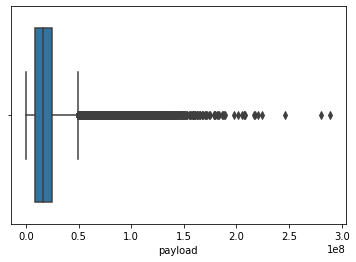

In [48]:
#Checking before-after handling outliers
sns.boxplot(df_ojol['payload'])

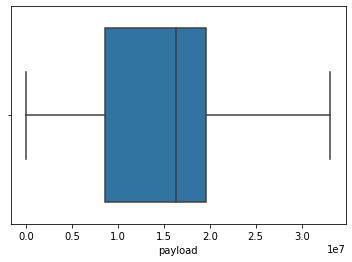

In [49]:
sns.boxplot(df_ojol_2['payload'])

In [50]:
df_ojol_2.describe().T

,count,mean,std,min,25%,50%,75%,max
mytsel_app_user,695597,1,0,0,0,1,1,1
total_revenue,695597,100723,41933,3,75460,99196,127528,202271
rev_voice,695597,1056,2412,0,0,0,10,11200
rev_sms,695597,229,290,0,0,165,330,1230
rev_broadband,695597,87028,43701,0,75000,78801,106720,187500
rev_voice_pack,695597,3548,15946,0,0,0,0,2348500
rev_sms_pack,695597,28,1274,0,0,0,0,591000
rev_data_pack,695597,104255,77403,0,75000,75000,150000,13225000
rev_pack_mytsel,695597,12643,58688,0,0,0,0,14265600
trx_voice,695597,56,46,1,19,55,75,193


### Converting categorical to numerical data

In [51]:
df_ojol_2 = pd.get_dummies(df_ojol_2, drop_first=True)

In [52]:
df_ojol_2.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice,...,segment_arpu_Medium (20-50K),segment_arpu_Top Usage (>250K),segment_arpu_Very High (120-250K),segment_arpu_Very Low (<=20K),los_range_1-3mo,los_range_3-6mo,los_range_6-9mo,los_range_9-12mo,los_range_1-3y,los_range_3y+
0,1,10092,8132,800,0,0,0,0,0,25,...,0,0,0,1,0,0,0,0,0,1
1,0,133657,0,165,0,0,0,0,0,186,...,0,0,1,0,0,0,0,0,0,1
2,0,30006,0,165,0,0,0,0,0,36,...,1,0,0,0,0,0,0,0,1,0
3,1,44503,7133,200,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,1
4,1,5073,4473,600,0,0,0,0,0,116,...,0,0,0,1,0,0,0,0,0,1


### Shifting dependent variable to the end

In [53]:
cols = list(df_ojol_2.columns.values)
cols.pop(cols.index('flag_taker'))
df_ojol_2 = df_ojol_2[cols+['flag_taker']]
df_ojol_2.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice,...,segment_arpu_Top Usage (>250K),segment_arpu_Very High (120-250K),segment_arpu_Very Low (<=20K),los_range_1-3mo,los_range_3-6mo,los_range_6-9mo,los_range_9-12mo,los_range_1-3y,los_range_3y+,flag_taker
0,1,10092,8132,800,0,0,0,0,0,25,...,0,0,1,0,0,0,0,0,1,0
1,0,133657,0,165,0,0,0,0,0,186,...,0,1,0,0,0,0,0,0,1,0
2,0,30006,0,165,0,0,0,0,0,36,...,0,0,0,0,0,0,0,1,0,0
3,1,44503,7133,200,0,0,0,0,0,22,...,0,0,0,0,0,0,0,0,1,0
4,1,5073,4473,600,0,0,0,0,0,116,...,0,0,1,0,0,0,0,0,1,0


In [54]:
df_ojol_2.columns

Index(['mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'los', 'ojol', 'total_recharge', 'region_02.Sumbagteng',
       'region_03.Sumbagsel', 'region_04.Western Jabotabek',
       'region_05.Central Jabotabek', 'region_06.Eastern Jabotabek',
       'region_07.Jabar', 'region_08.Jateng', 'region_09.Jatim',
       'region_10.Balinusra', 'region_11.Kalimantan', 'region_12.Sulawesi',
       'region_13.Puma', 'first_rank_category_Communications',
       'first_rank_category_Education', 'first_rank_category_FoodDrinks',
       'first_rank_category_Games', 'first_rank_category_Music',
       'first_rank_category_News_Lifestyle', 'first_rank_category_Others',
       'first_rank_c

### EDA Part 2

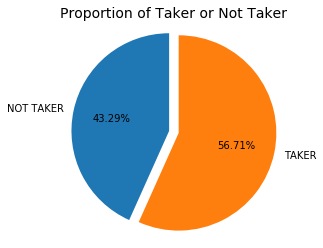

In [55]:
labels = 'NOT TAKER', 'TAKER'
sizes = [df_ojol_2.flag_taker[df_ojol_2['flag_taker']==0].count(), df_ojol_2.flag_taker[df_ojol_2['flag_taker']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Proportion of Taker or Not Taker", size=14)
plt.show()

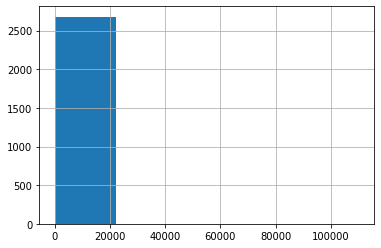

In [56]:
#ojol_clean['los'].value_counts().hist(bins=3);
df_ojol_2['los'].value_counts().hist(bins=5)

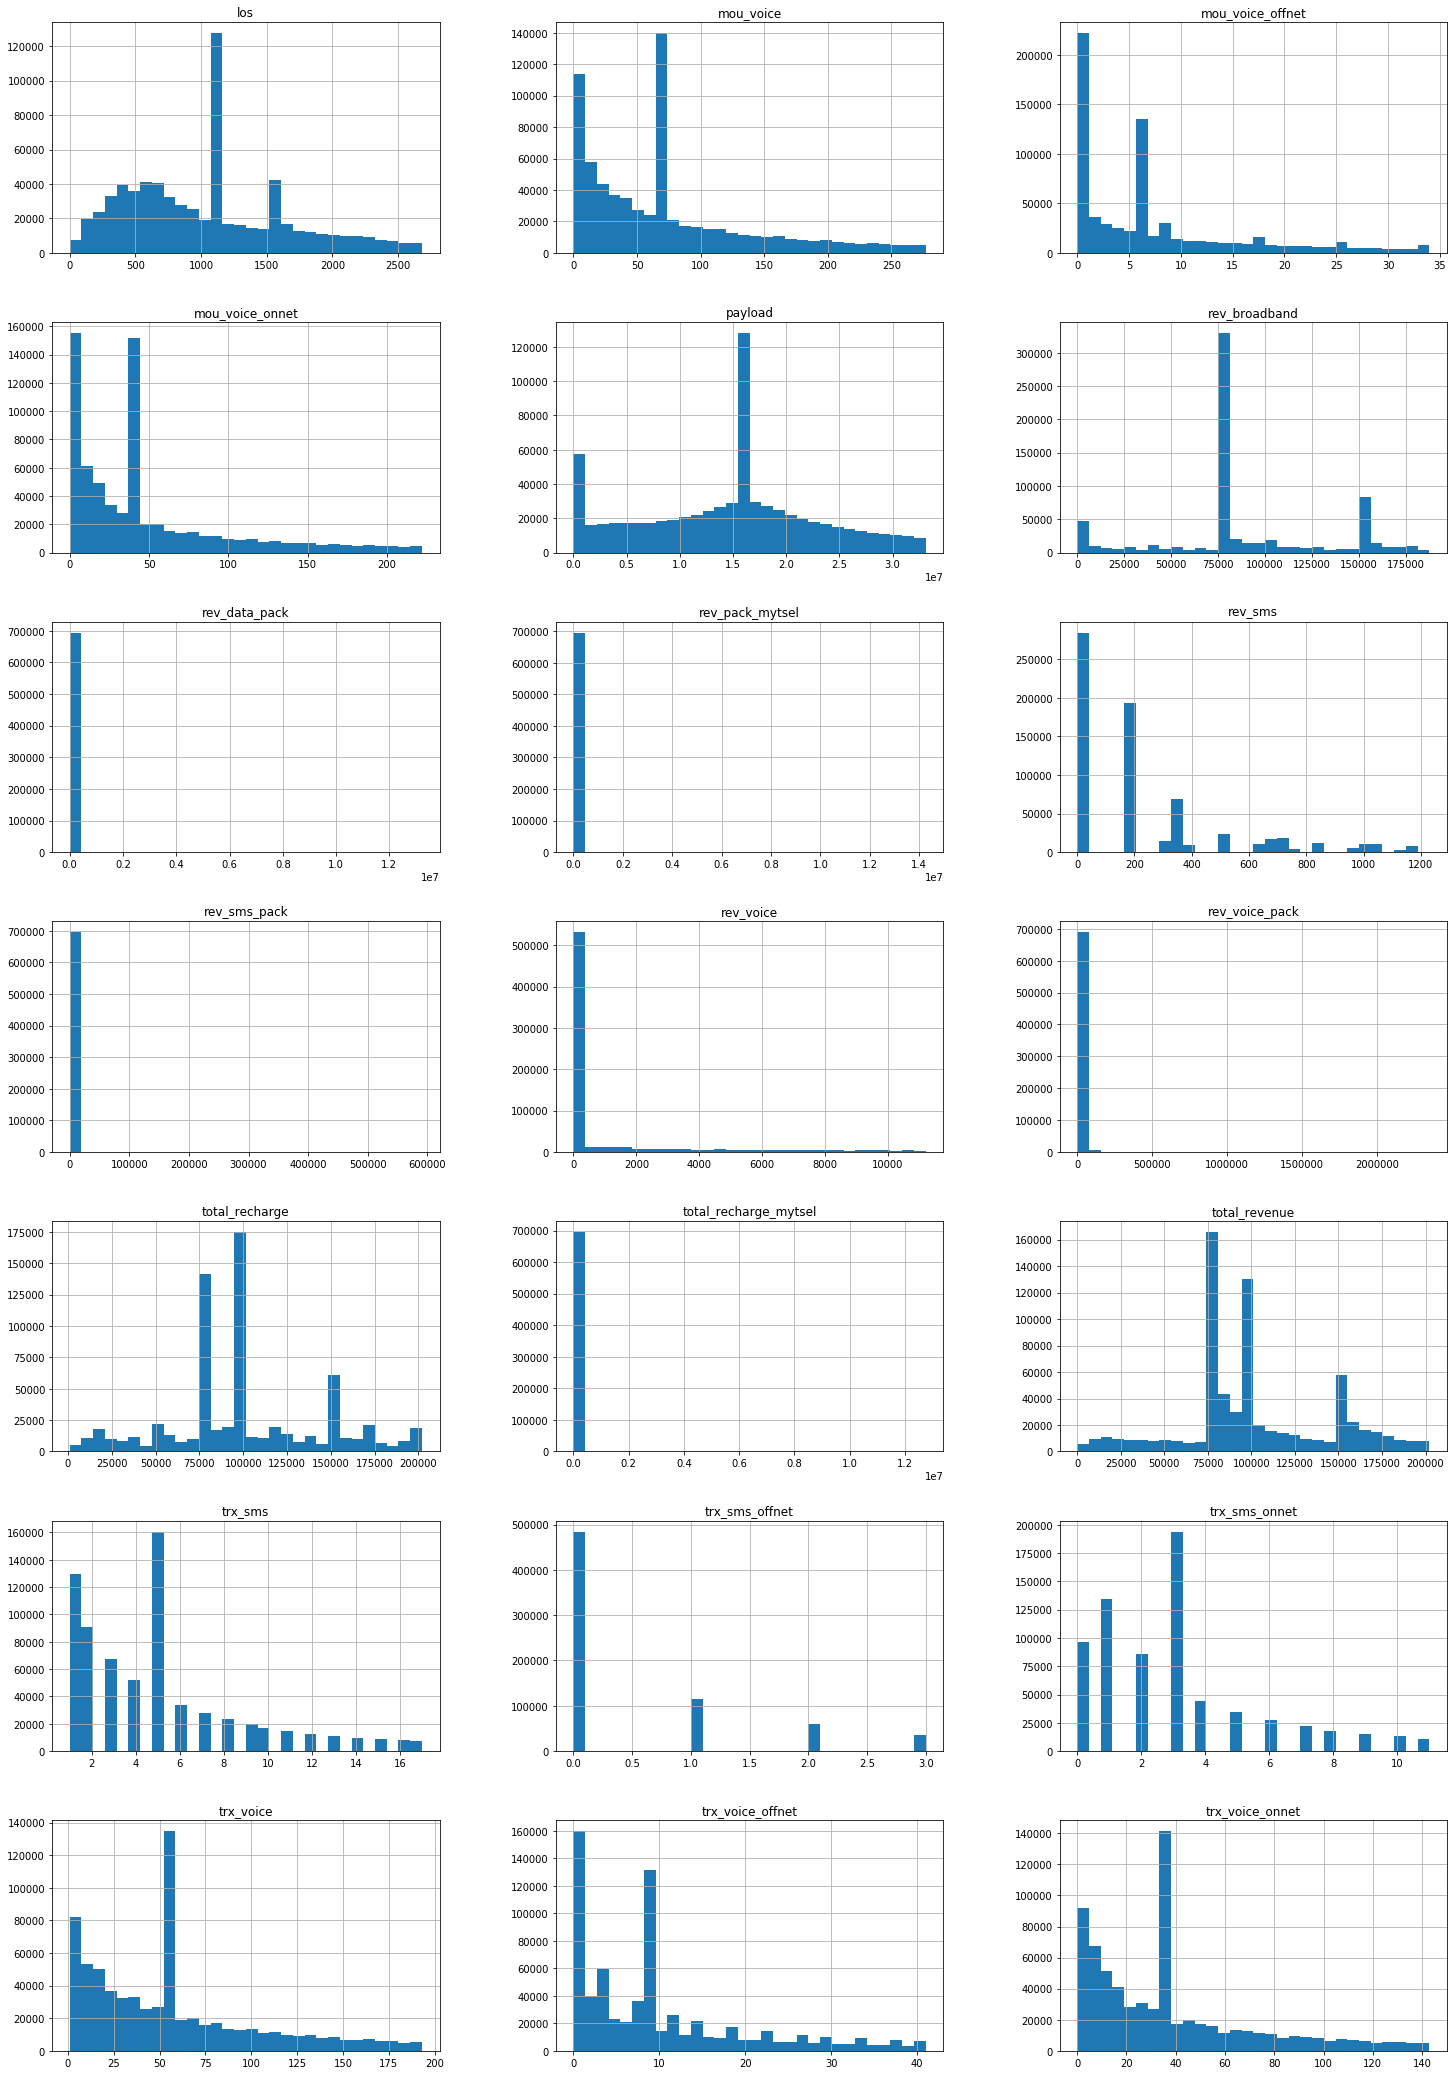

In [57]:
df_ojol_2.hist(column=['total_revenue','rev_voice','rev_sms','rev_broadband','rev_voice_pack','rev_sms_pack','rev_data_pack','rev_pack_mytsel','trx_voice', 'trx_voice_onnet','trx_voice_offnet','mou_voice','mou_voice_offnet','mou_voice_onnet','trx_sms','trx_sms_onnet','trx_sms_offnet','payload','total_recharge_mytsel','los','total_recharge'], bins=30, figsize=(25, 120), layout=(22, 3));


## Feature Engineering

In [58]:
#Ratio revenue per service (voice/sms/broadband) terhadap total revenue
df_ojol_2['rev_voice_ratio']=df_ojol_2['rev_voice']/df_ojol_2['total_revenue']
df_ojol_2['rev_voice_ratio']=df_ojol_2['rev_voice_ratio'].fillna(value=0)

df_ojol_2['rev_sms_ratio']=df_ojol_2['rev_sms']/df_ojol_2['total_revenue']
df_ojol_2['rev_sms_ratio']=df_ojol_2['rev_sms_ratio'].fillna(value=0)

df_ojol_2['rev_broadband_ratio']=df_ojol_2['rev_broadband']/df_ojol_2['total_revenue']
df_ojol_2['rev_broadband_ratio']=df_ojol_2['rev_broadband_ratio'].fillna(value=0)

In [59]:
#Ratio trx voice onnet atau offnet terhadap total trx voice secara menyeluruh
df_ojol_2['trx_voice_onnet_ratio']=df_ojol_2['trx_voice_onnet']/df_ojol_2['trx_voice']
df_ojol_2['trx_voice_onnet_ratio']=df_ojol_2['trx_voice_onnet_ratio'].fillna(value=0)

df_ojol_2['trx_voice_offnet_ratio']=df_ojol_2['trx_voice_offnet']/df_ojol_2['trx_voice']
df_ojol_2['trx_voice_offnet_ratio']=df_ojol_2['trx_voice_offnet_ratio'].fillna(value=0)

In [60]:
#Ratio trx sms onnet atau offnet terhadap total trx sms secara menyeluruh
df_ojol_2['trx_sms_onnet_ratio']=df_ojol_2['trx_sms_onnet']/df_ojol_2['trx_sms']
df_ojol_2['trx_sms_onnet_ratio']=df_ojol_2['trx_sms_onnet_ratio'].fillna(value=0)

df_ojol_2['trx_sms_offnet_ratio']=df_ojol_2['trx_sms_offnet']/df_ojol_2['trx_sms']
df_ojol_2['trx_sms_offnet_ratio']=df_ojol_2['trx_sms_offnet_ratio'].fillna(value=0)

In [61]:
df_ojol_2['mou_voice_onnet_ratio']=df_ojol_2['mou_voice_onnet']/df_ojol_2['mou_voice']
df_ojol_2['mou_voice_onnet_ratio']=df_ojol_2['mou_voice_onnet_ratio'].fillna(value=0)

df_ojol_2['mou_voice_offnet_ratio']=df_ojol_2['mou_voice_offnet']/df_ojol_2['mou_voice']
df_ojol_2['mou_voice_offnet_ratio']=df_ojol_2['mou_voice_offnet_ratio'].fillna(value=0)

In [62]:
df_ojol_2['recharge_revenue_ratio']=df_ojol_2['total_recharge']/df_ojol_2['total_revenue']
df_ojol_2['recharge_revenue_ratio']=df_ojol_2['recharge_revenue_ratio'].fillna(value=0)

In [63]:
df_ojol_2['average_rev_voice_per_trx']=(df_ojol_2['rev_voice'])/df_ojol_2['trx_voice']
df_ojol_2['average_rev_voice_per_trx']=df_ojol_2['average_rev_voice_per_trx'].fillna(value=0)

In [64]:
df_ojol_2['average_rev_sms_per_trx']=(df_ojol_2['rev_sms'])/df_ojol_2['trx_sms']
df_ojol_2['average_rev_sms_per_trx']=df_ojol_2['average_rev_sms_per_trx'].fillna(value=0)

In [65]:
df_ojol_2['average_rev_data_per_trx']=(df_ojol_2['rev_broadband'])/df_ojol_2['payload']
df_ojol_2['average_rev_data_per_trx']=df_ojol_2['average_rev_data_per_trx'].fillna(value=0)

In [66]:
df_ojol_2['average_mou_voice_per_trx']=(df_ojol_2['mou_voice'])/df_ojol_2['trx_voice']
df_ojol_2['average_mou_voice_per_trx']=df_ojol_2['average_mou_voice_per_trx'].fillna(value=0)

In [67]:
df_ojol_2.columns

Index(['mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'los', 'ojol', 'total_recharge', 'region_02.Sumbagteng',
       'region_03.Sumbagsel', 'region_04.Western Jabotabek',
       'region_05.Central Jabotabek', 'region_06.Eastern Jabotabek',
       'region_07.Jabar', 'region_08.Jateng', 'region_09.Jatim',
       'region_10.Balinusra', 'region_11.Kalimantan', 'region_12.Sulawesi',
       'region_13.Puma', 'first_rank_category_Communications',
       'first_rank_category_Education', 'first_rank_category_FoodDrinks',
       'first_rank_category_Games', 'first_rank_category_Music',
       'first_rank_category_News_Lifestyle', 'first_rank_category_Others',
       'first_rank_c

In [68]:
df_ojol_2.head(5)

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice,...,trx_voice_offnet_ratio,trx_sms_onnet_ratio,trx_sms_offnet_ratio,mou_voice_onnet_ratio,mou_voice_offnet_ratio,recharge_revenue_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx,average_rev_data_per_trx,average_mou_voice_per_trx
0,1,10092,8132,800,0,0,0,0,0,25,...,0,1,0,0,0,1,325,200,0,0
1,0,133657,0,165,0,0,0,0,0,186,...,0,1,0,1,0,1,0,24,0,1
2,0,30006,0,165,0,0,0,0,0,36,...,1,0,0,0,1,1,0,24,0,1
3,1,44503,7133,200,0,0,0,0,0,22,...,0,1,0,1,0,0,324,200,0,1
4,1,5073,4473,600,0,0,0,0,0,116,...,0,1,0,1,0,3,39,100,0,1


## Feature Selection

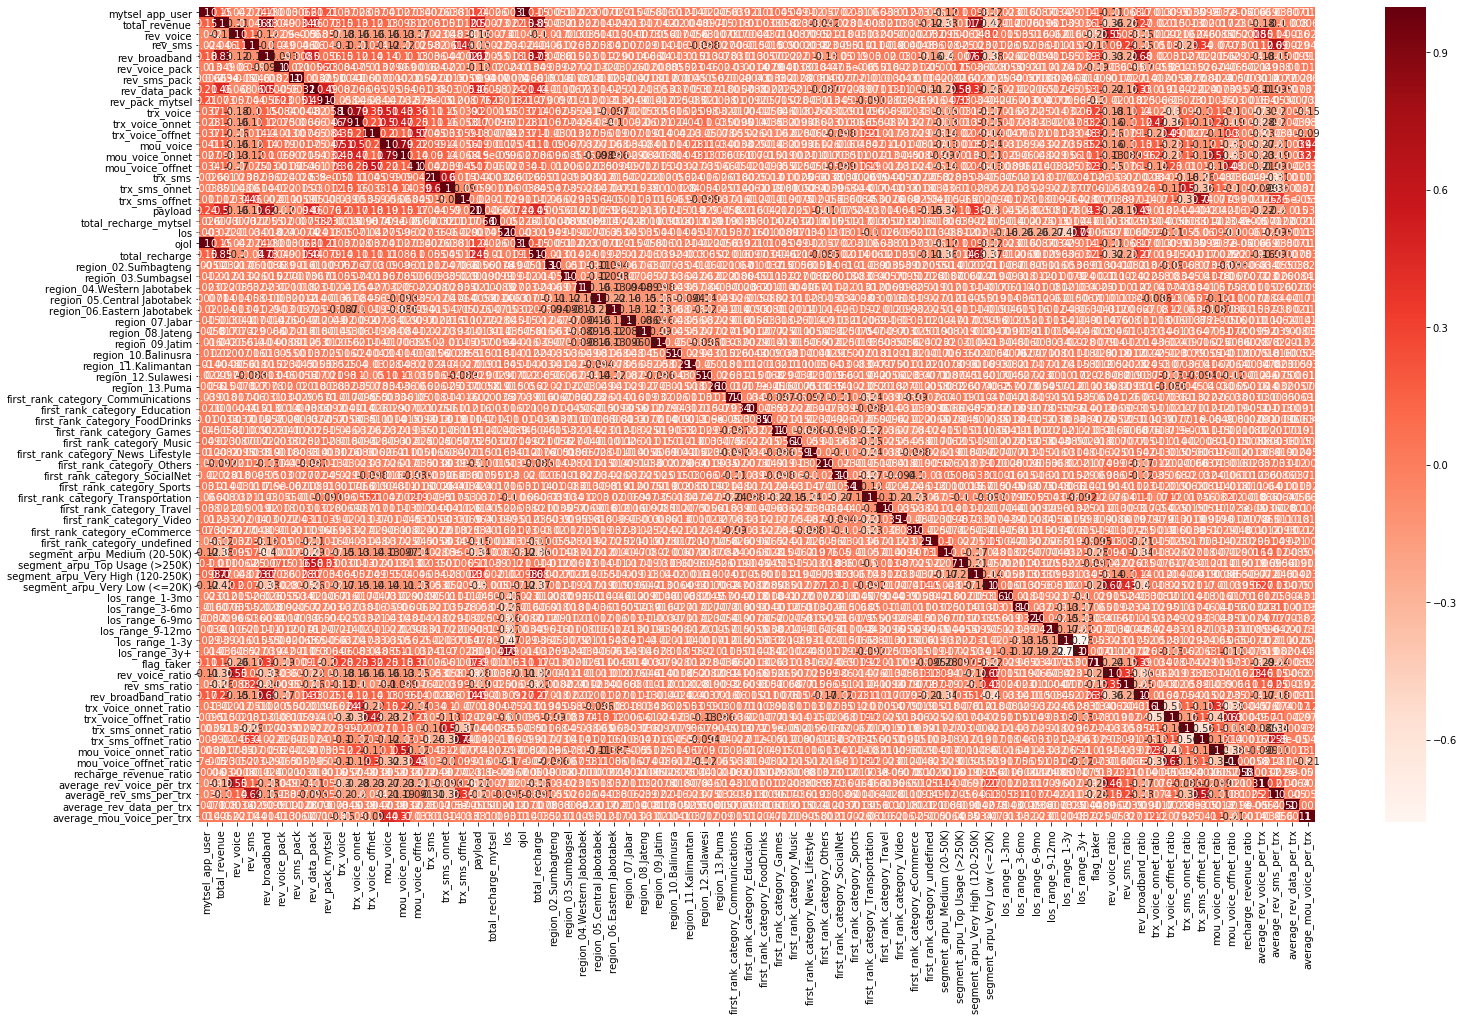

In [80]:
#FILTER METHOD
#Using Pearson Correlation
plt.figure(figsize=(25,15))
cor = df_ojol_2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [70]:
#Correlation with output variable
cor_target = abs(cor["flag_taker"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

mytsel_app_user                      0
total_revenue                        0
rev_voice                            0
rev_sms                              0
rev_broadband                        0
rev_voice_pack                       0
rev_data_pack                        0
rev_pack_mytsel                      0
trx_voice                            0
trx_voice_onnet                      0
trx_voice_offnet                     0
mou_voice                            0
mou_voice_onnet                      0
mou_voice_offnet                     0
payload                              0
ojol                                 0
total_recharge                       0
first_rank_category_Transportation   0
segment_arpu_Medium (20-50K)         0
segment_arpu_Very Low (<=20K)        0
flag_taker                           1
rev_voice_ratio                      0
rev_sms_ratio                        0
rev_broadband_ratio                  0
average_rev_voice_per_trx            0
average_rev_sms_per_trx  

In [71]:
columns=relevant_features.index 
columns.to_frame(index=False)

,0
0,mytsel_app_user
1,total_revenue
2,rev_voice
3,rev_sms
4,rev_broadband
5,rev_voice_pack
6,rev_data_pack
7,rev_pack_mytsel
8,trx_voice
9,trx_voice_onnet


In [72]:
df_ojol_3 = df_ojol_2[columns]

print("{} rows x {} columns".format(df_ojol_3.shape[0], df_ojol_3.shape[1])) 

695597 rows x 26 columns


In [75]:
df_ojol_3.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_data_pack,rev_pack_mytsel,trx_voice,trx_voice_onnet,...,total_recharge,first_rank_category_Transportation,segment_arpu_Medium (20-50K),segment_arpu_Very Low (<=20K),flag_taker,rev_voice_ratio,rev_sms_ratio,rev_broadband_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx
0,1,10092,8132,800,0,0,0,0,25,12,...,10000,1,0,1,0,1,0,0,325,200
1,0,133657,0,165,0,0,0,0,186,120,...,135000,1,0,0,0,0,0,0,0,24
2,0,30006,0,165,0,0,0,0,36,8,...,30000,1,1,0,0,0,0,0,0,24
3,1,44503,7133,200,0,0,0,0,22,15,...,15000,0,1,0,0,0,0,0,324,200
4,1,5073,4473,600,0,0,0,0,116,116,...,15000,1,0,1,0,1,0,0,39,100


# MODELING

## Split Data

In [77]:
from sklearn.model_selection import train_test_split
X = df_ojol_3.iloc[:, :25]
Y = df_ojol_3.iloc[:, 25:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## Cross Validation Multi Model

## Modeling

## Model Interpretability

### SHAP Values

### Lime

# CLUSTERING